Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [18]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/DataSets/bank.csv'

bank_data = pd.read_csv(file_path, sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [20]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Identify features (X) and target variable (y)

Conver categorical data using one-hot

In [21]:
bank_data = pd.get_dummies(bank_data, drop_first=True)

In [22]:
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [23]:
X = bank_data.drop(columns=['y_yes'])
y = bank_data['y_yes']

Data preprocessing

In [24]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data splitting (train:test)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Check the shape

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3616, 42) (905, 42) (3616,) (905,)


Create the model

In [49]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Setting hyperparameters

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Train the model

In [65]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.2153 - val_accuracy: 0.8936 - val_loss: 1.3611
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8815 - loss: 0.2136 - val_accuracy: 0.8936 - val_loss: 1.3657
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8789 - loss: 0.1918 - val_accuracy: 0.8936 - val_loss: 1.3198
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.1788 - val_accuracy: 0.8936 - val_loss: 1.3111
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8861 - loss: 0.1789 - val_accuracy: 0.8950 - val_loss: 1.3234
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.1718 - val_accuracy: 0.8936 - val_loss: 1.3340
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.1725 - val_accuracy: 0.8950 - val_loss: 1.3615
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.1788 - val_accuracy: 0.

Evaluate the model

In [59]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Performance metrics

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93       801
        True       0.45      0.42      0.44       104

    accuracy                           0.87       905
   macro avg       0.69      0.68      0.68       905
weighted avg       0.87      0.87      0.87       905



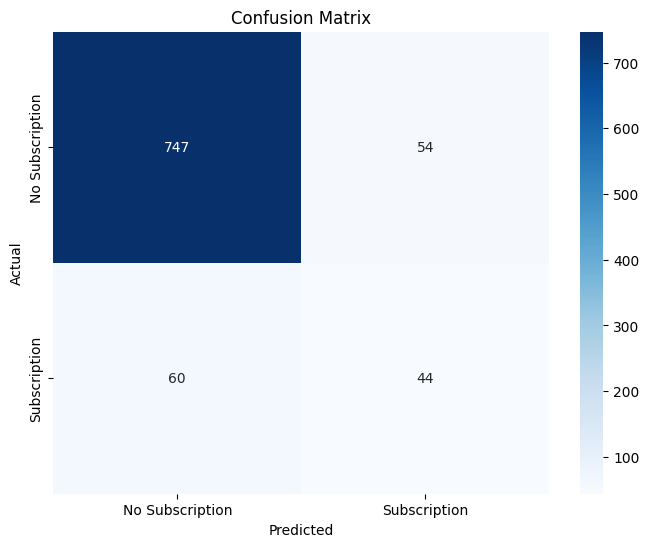

In [60]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




Loss and accuracy plots

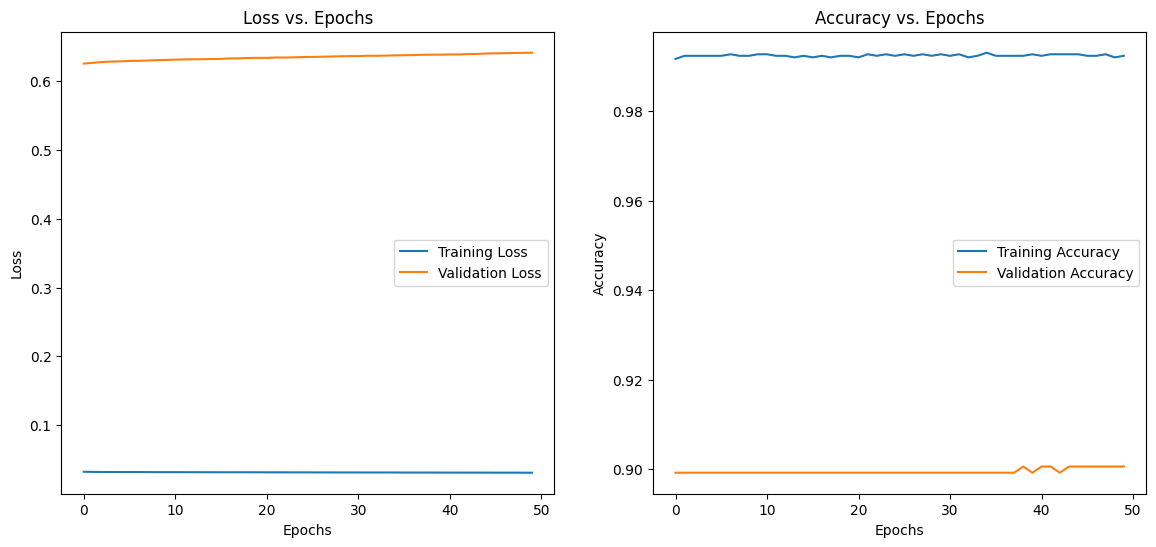

In [61]:
# Plotting the training and validation loss/accuracy
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.show()